In [46]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from src.load_data import *
from src.graphs import *
from src.statistical_tests import *
from src.utils import *

## Few notes:
* **total_clearance_between_visit** - wzgledem poprzedniej wizyty
* **clearance_between_visit** - wzgledem poczatku
* we group to **nereast** time group 


#### To-dos:
* Sprawdz ilosc grup z peaku w gory!
* Sprawdzic linear fit i non-linear fit
* Sprawdz rozne 
* Sprawdz methodologie
* Sila statystyczna (p-value)
* Sprawdz rozne kwartaly
* Pogrobic linie

#### Few **old** notes:
* The table above should include all information You need
* `wizyta po ilu zabiegach` -> can have some skipped zabiegy & can start at other point than 0
* `czas` -> defined as czas between this and next visit



In [48]:
data = get_data(format_type='all', remove_minus_ones = False)
data

default time group has GROUPS defined as: [0, 90, 180, 270, 360]


,surname,time,summed_time,time_group,visit_number,total_clearence_in_between_visits,total_clearence_in_respect_to_beginning,------------
0,1.Gasek,57,57,1,1,10.435940,10.435942,
1,1.Gasek,958,1015,4,2,-1.909880,8.725376,
2,1.Gasek,70,1085,1,3,-3.152340,5.848092,
3,1.Gasek,63,1148,1,4,26.204230,30.519873,
4,1.Gasek,238,1386,3,5,-0.996100,29.827784,
...,...,...,...,...,...,...,...,...
423,70. Wójcicki,84,255,1,6,-1.909880,75.286637,
424,70. Wójcicki,84,339,1,7,-3.152340,69.913296,
425,70. Wójcicki,70,409,1,8,26.204230,83.173308,
426,70. Wójcicki,160,569,2,9,-0.996100,74.593279,


## Get ANOVA & ttest between buckets:

In [61]:
from src.statistical_tests import bucket_anova_n_plot
bucket_anova_n_plot()

ImportError: cannot import name 'bucket_anova_n_plot' from 'src.statistical_tests' (/Users/szczekulskij/side_projects/long-term-analysis-of-pws/src/statistical_tests.py)

In [6]:
non_moved_df = get_data(format_type='all')
moved_df = get_data(format_type='moved_to_0')
non0s_df = get_data(format_type='all_without_0s')

print('looking at the moved data:')
moved_df.head(10)

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
looking at the moved data:


,surname,time,summed_time,time_group,visit_number,total_clearence_in_between_visits,total_clearence_in_respect_to_beginning,------------,unmoved_visit_nr
0,1.Gasek,57,57,1,1,10.43594,10.435942,,1
1,1.Gasek,958,1015,4,2,-1.90988,8.725376,,2
2,1.Gasek,70,1085,1,3,-3.15234,5.848092,,3
3,1.Gasek,63,1148,1,4,26.20423,30.519873,,4
4,1.Gasek,238,1386,3,5,-0.99610,29.827784,,5
5,2. Kołodziejska,217,217,2,1,66.95658,66.956580,,1
6,2. Kołodziejska,42,259,0,2,20.93472,73.874130,,2
7,2. Kołodziejska,26,306,0,5,-59.55360,71.032640,,5
8,2. Kołodziejska,294,600,3,6,76.67272,93.242700,,6
9,4. Krzysztoń,35,66,0,1,-18.03010,-13.664000,,3


### Wyniki - totalna poprawa:

In [7]:
data.loc[data["total_clearence_in_respect_to_beginning"] <= 0]

AttributeError: 'float' object has no attribute 'loc'

limit: 0. |% patients: 95.16
limit: 5. |% patients: 95.16
limit: 10. |% patients: 93.55
limit: 15. |% patients: 88.71
limit: 20. |% patients: 83.87
limit: 25. |% patients: 82.26
limit: 30. |% patients: 80.65
limit: 35. |% patients: 79.03
limit: 40. |% patients: 77.42
limit: 45. |% patients: 70.97
limit: 50. |% patients: 67.74
limit: 55. |% patients: 62.9
limit: 60. |% patients: 50.0
limit: 65. |% patients: 45.16
limit: 70. |% patients: 32.26
limit: 75. |% patients: 24.19
limit: 80. |% patients: 17.74
limit: 85. |% patients: 6.45
limit: 90. |% patients: 4.84
limit: 95. |% patients: 3.23


Text(0, 0.5, '% of patients over GCE threshold')

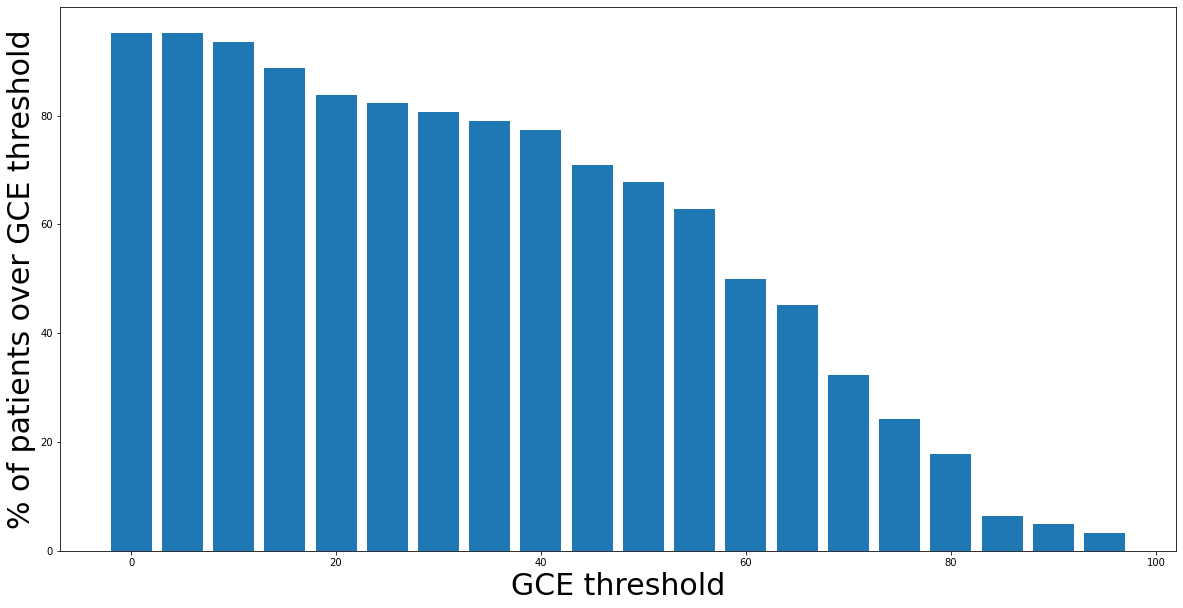

In [ ]:
data = df.groupby(by  = 'surname', as_index = False).agg({'total_clearence_in_respect_to_beginning' : 'max'})
x = len(data.loc[data['total_clearence_in_respect_to_beginning'] >=25] )

def get_pct_of_people_over_x(df, x):
    nr = len(data.loc[data['total_clearence_in_respect_to_beginning'] >=x] )
    pct = round(nr/len(df) * 100, 2)
    return pct


list_of_limits = [i for i in range(0,100,5)]
limits_data = [get_pct_of_people_over_x(data, x) for x in list_of_limits]
for a,b in zip(limits_data, list_of_limits):
    print(f"limit: {b}. |% patients: {a}")

plt.figure(figsize=(20,10))
plt.bar(list_of_limits, limits_data, width = 4)
plt.xlabel("GCE threshold", size = 30)
plt.ylabel("% of patients over GCE threshold", size = 30)

In [ ]:
get_stats_for_abstract(df = None, format_type = 'all')

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
median of maximum total clearence: 59.613085
% of patients that had a total_clearence of minimum 25%: 82.25806451612904
% of patients that had a total_clearence of minimum 50%: 67.74193548387096
% of patients that had a total_clearence of minimum 75%: 24.193548387096776
% of patients that had a total_clearence of minimum 90%: 4.838709677419355


,surname,total_clearence_in_respect_to_beginning
0,1.Gasek,30.519873
1,10.Będzinowski szyja,70.360110
2,11. Cicha-kwiecień,52.934780
3,12. Januszewska,60.984150
4,13.Zborowski,81.183610
...,...,...
57,7. Kowal,82.977240
58,70. Wójcicki,83.173308
59,71. Zając,9.855161
60,8.Wierny,71.835400


In [ ]:
get_stats_for_abstract2(df = None, format_type = 'all', visit_number_buckets = [0,2,5,10,15,20])

In [ ]:
# Print some overall info such as:
# nr of people w. different number of visits
# nr of people in different waiting buckets

# Main Graphs
### Total clearence compared to start:

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]


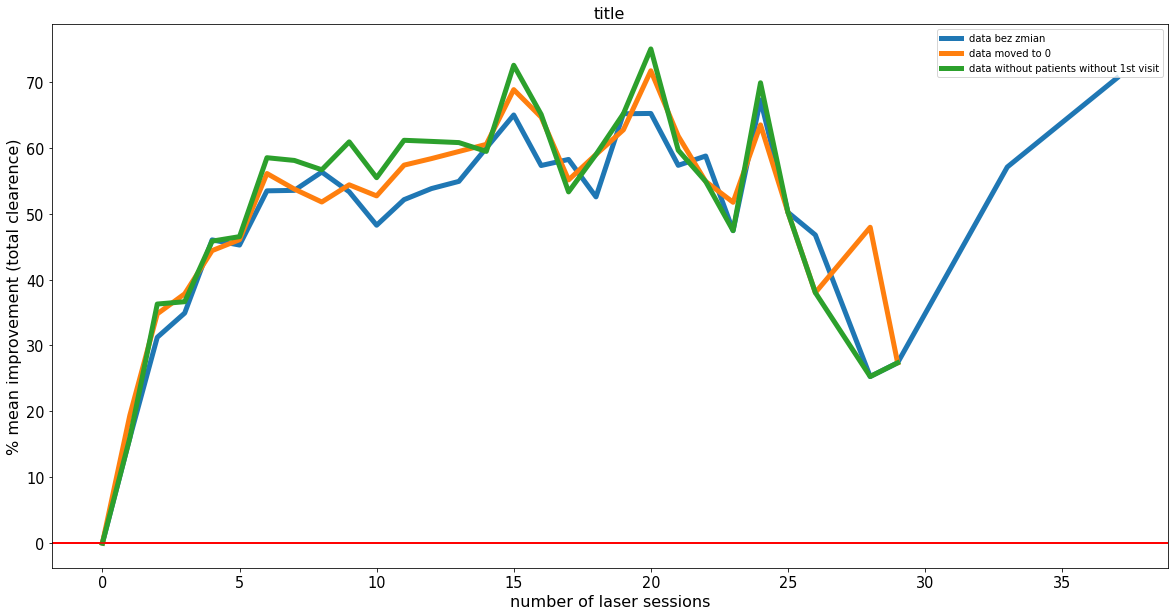

In [8]:
plt.figure(figsize=(20,10))
data = get_data(format_type='all',remove_minus_ones = False )
data2 = get_data(format_type='moved_to_0',remove_minus_ones = False )
data3 = get_data(format_type='all_without_0s',remove_minus_ones = False )
agg_column_graph(data, label = 'data bez zmian', column = 'total_clearence_in_respect_to_beginning')
agg_column_graph(data2, label = 'data moved to 0', column = 'total_clearence_in_respect_to_beginning')
agg_column_graph(data3, label = 'data without patients without 1st visit', column = 'total_clearence_in_respect_to_beginning', title = 'title')

No handles with labels found to put in legend.


default time group has GROUPS defined as: [0, 90, 180, 270, 360]


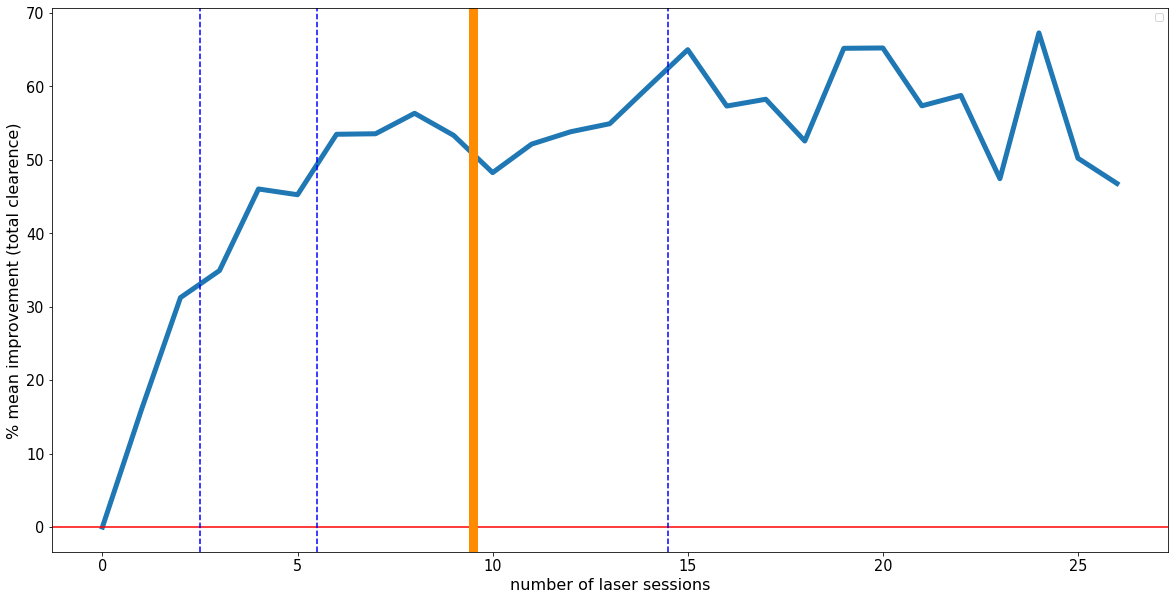

In [9]:
plt.figure(figsize=(20,10))
data = get_data(format_type='all',remove_minus_ones = False )
agg_column_graph(data, agg = 'mean', label = '', column = 'total_clearence_in_respect_to_beginning', title = '', cut_last_x_visits = 27)
plt.axvline(x=2.5, color='b', linestyle='--')
plt.axvline(x=5.5, color='b', linestyle='--')
plt.axvline(x=14.5, color='b', linestyle='--')
plt.axvline(x=9.5, color='darkorange', linestyle='-',  lw = 9)

# Logaithmic and polynomial fits
# If the logathmic fit is the best fit
# Anova -> posthoc ttest ()
# Plot the scatter of data for better visibility 
# (try moving avg for smoothen avg)

No handles with labels found to put in legend.


default time group has GROUPS defined as: [0, 90, 180, 270, 360]


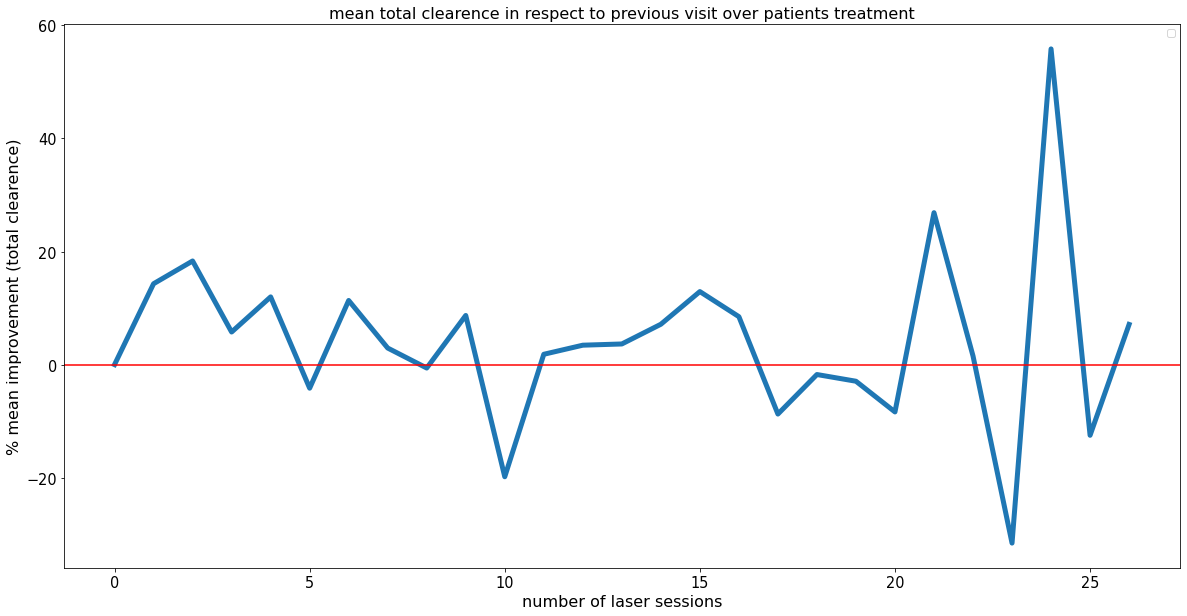

In [10]:
data = get_data(format_type='all',remove_minus_ones = True )
plt.figure(figsize=(20,10))
agg_column_graph(data, label = '', column = 'total_clearence_in_between_visits', title = 'mean total clearence in respect to previous visit over patients treatment', cut_last_x_visits = 26)

### Srednia poprawa miedzy wizytami:

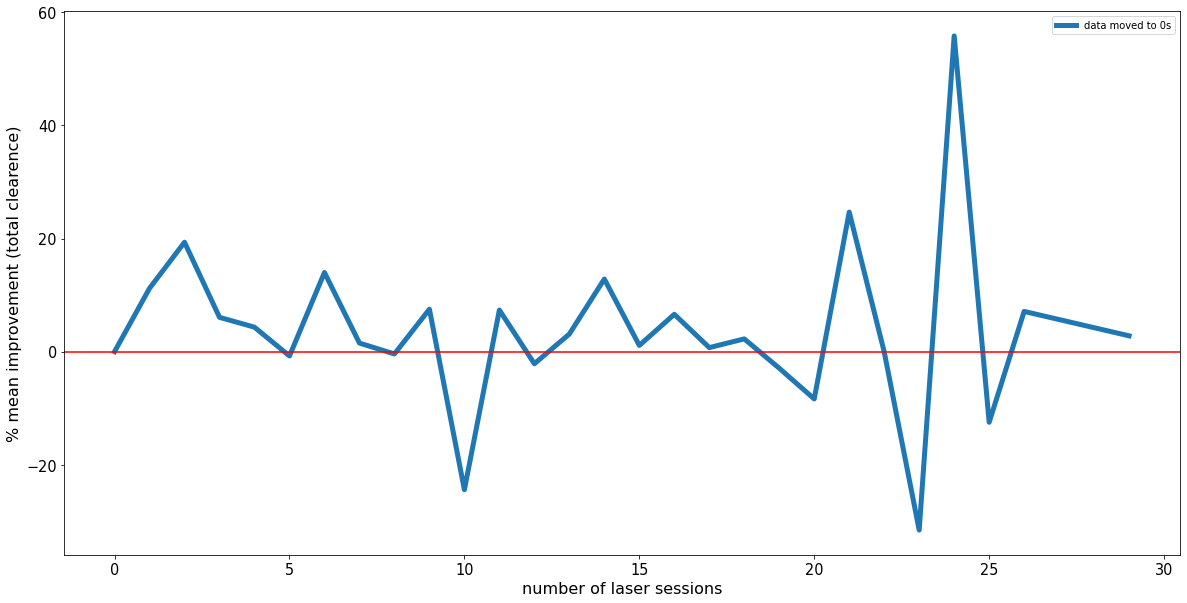

In [11]:
plt.figure(figsize=(20,10))
plt.title("srednia poprawa miedzy wizytami")
agg_column_graph(moved_df, label = 'data moved to 0s')
plt.legend()

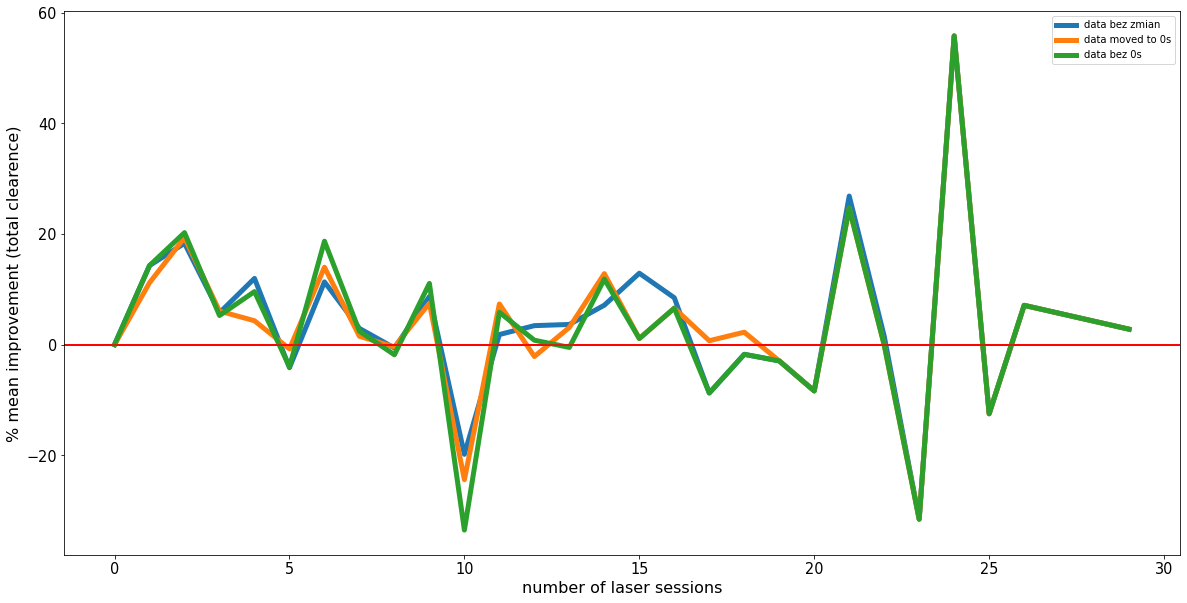

In [12]:
plt.figure(figsize=(20,10))
agg_column_graph(non_moved_df, label = 'data bez zmian', column = 'total_clearence_in_between_visits')
agg_column_graph(moved_df, label = 'data moved to 0s', column = 'total_clearence_in_between_visits')
agg_column_graph(non0s_df, label = 'data bez 0s', column = 'total_clearence_in_between_visits')

### Showcase of how tests works:

In [13]:
data, expected_frequences = chi_squared_test(non_moved_df, name = 'example test', display_data = True)


,surname,time,summed_time,time_group,visit_number,total_clearence_in_between_visits,total_clearence_in_respect_to_beginning,------------,mean improvement below 0
0,1.Gasek,57,57,1,1,10.43594,10.435942,,False
1,1.Gasek,958,1015,4,2,-1.90988,8.725376,,True
2,1.Gasek,70,1085,1,3,-3.15234,5.848092,,True
3,1.Gasek,63,1148,1,4,26.20423,30.519873,,False
4,1.Gasek,238,1386,3,5,-0.99610,29.827784,,True


GROUPS: [0, 90, 180, 270, 360]


days passed,0,1,2,3,4
mean improvement below 0,,,,,
False,109,97,20,6,2
True,55,38,8,5,11


p-value of chi squred contigency test for example test: 0.001215366770283146 (w. Yates correction - good practice)
expected frequencies were:


,0,1,2,3,4
False,109.333333,90.0,18.666667,7.333333,8.666667
True,54.666667,45.0,9.333333,3.666667,4.333333


In [14]:
data.rename(columns = {0 : '1-90',
                       1 : '91-180',
                       2 : '181-270',
                       3 : '271 - 360',
                       4 : '361+',
                       
}, inplace = True)
data['type'] = 'frequencies'

expected_frequences = expected_frequences.rename(columns = {0 : '1-90',
                       1 : '91-180',
                       2 : '181-270',
                       3 : '271 - 360',
                       4 : '361+',
                       
}).round(2)
expected_frequences['type'] = 'expected_frequences'

In [15]:
display(data)
print('expected frequencies:')
display(expected_frequences)
print('Chi squred contigency test p-value: 0.014')

days passed,1-90,91-180,181-270,271 - 360,361+,type
mean improvement below 0,,,,,,
False,109,97,20,6,2,frequencies
True,55,38,8,5,11,frequencies


expected frequencies:


,1-90,91-180,181-270,271 - 360,361+,type
False,109.33,90.0,18.67,7.33,8.67,expected_frequences
True,54.67,45.0,9.33,3.67,4.33,expected_frequences


Chi squred contigency test p-value: 0.014


In [16]:
expected_frequences

,1-90,91-180,181-270,271 - 360,361+,type
False,109.33,90.0,18.67,7.33,8.67,expected_frequences
True,54.67,45.0,9.33,3.67,4.33,expected_frequences


No handles with labels found to put in legend.


Pearsons correlation of the linear fit for : -0.973 (very bad practice though)
p-value of chi squred contigency test for : nan (w. Yates correction - good practice)



,nr_visit_group,patients_in_bucket
0,0,199
1,10,128
2,20,24


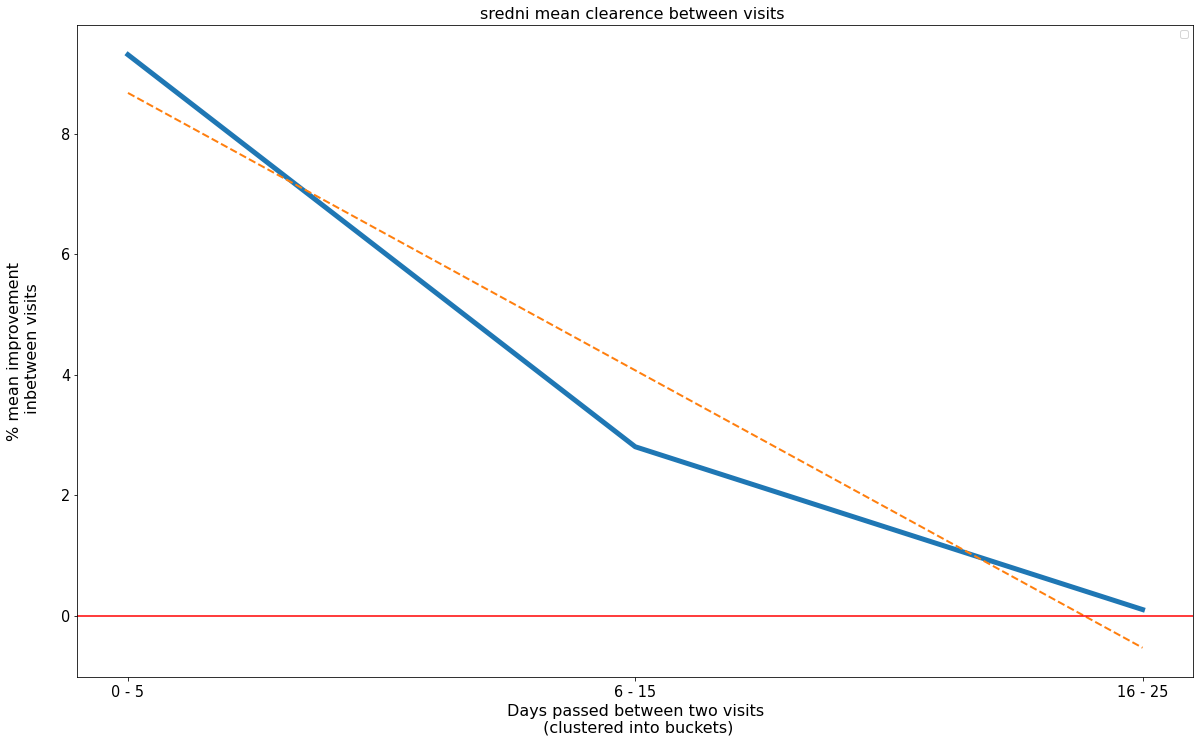

In [17]:
plt.figure(figsize=(20,12))
time_group_based_avg_graph(moved_df, 
                           GROUPS = [0,10,20], 
                           increment = 10, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearence_in_between_visits')

Pearsons correlation of the linear fit for nie przesunieci: -0.740 (very bad practice though)


ValueError: Grouper for 'days passed' not 1-dimensional

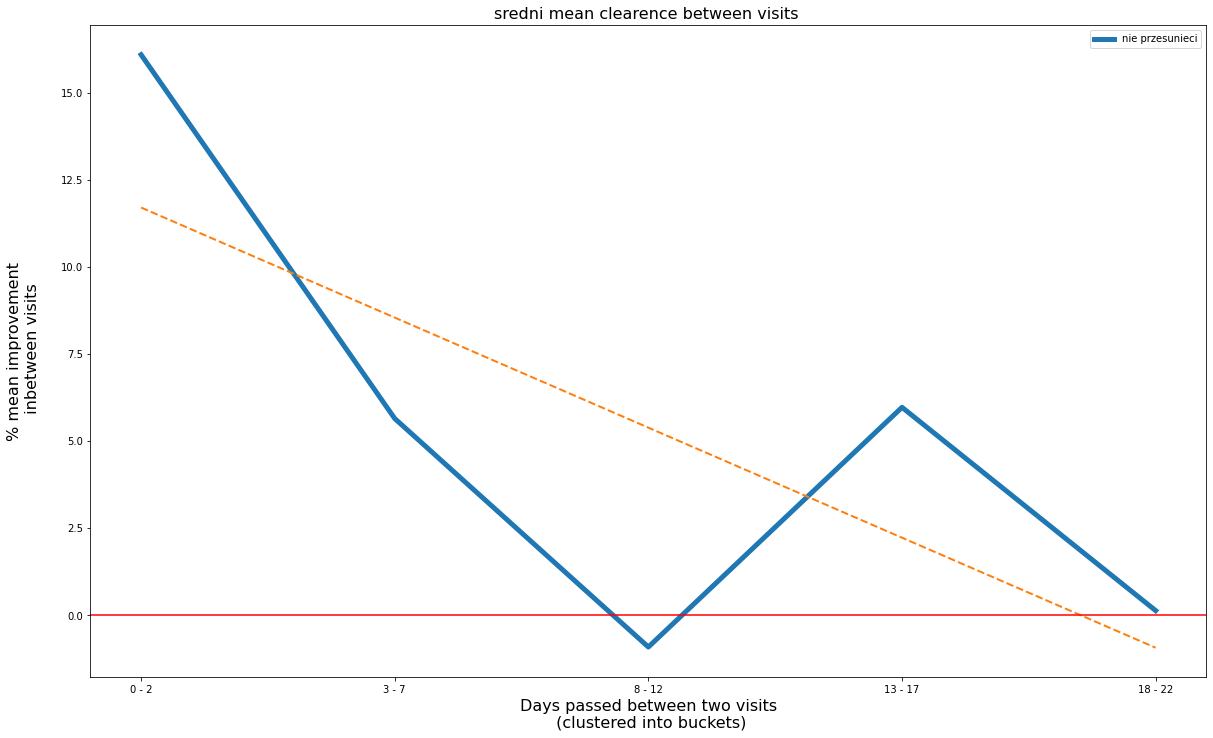

In [18]:
plt.figure(figsize=(20,12))
a = time_group_based_avg_graph(non_moved_df, 
                           GROUPS = [0,5,10,15,20], 
                           increment = 5, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearence_in_between_visits',
                           label = 'nie przesunieci')
time_group_based_avg_graph(moved_df, 
                           GROUPS = [0,5,10,15,20], 
                           increment = 5, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearence_in_between_visits',
                           label = 'przesunieci')

time_group_based_avg_graph(non0s_df, 
                           GROUPS = [0,5,10,15,20], 
                           increment = 5, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearence_in_between_visits',
                           label = 'usunieci bez 1 wizyty')
display(a)
plt.title('mean total_clearencs vs nr_visits group')
plt.xlabel('nr_visits_group')

## Time Group based avg graphs:
* Removed graphs for patients after 15th and 20th visit - since there is barely any data there

Pearsons correlation of the linear fit for visits with nunber 10 and further: -0.770 (very bad practice though)


ValueError: Grouper for 'days passed' not 1-dimensional

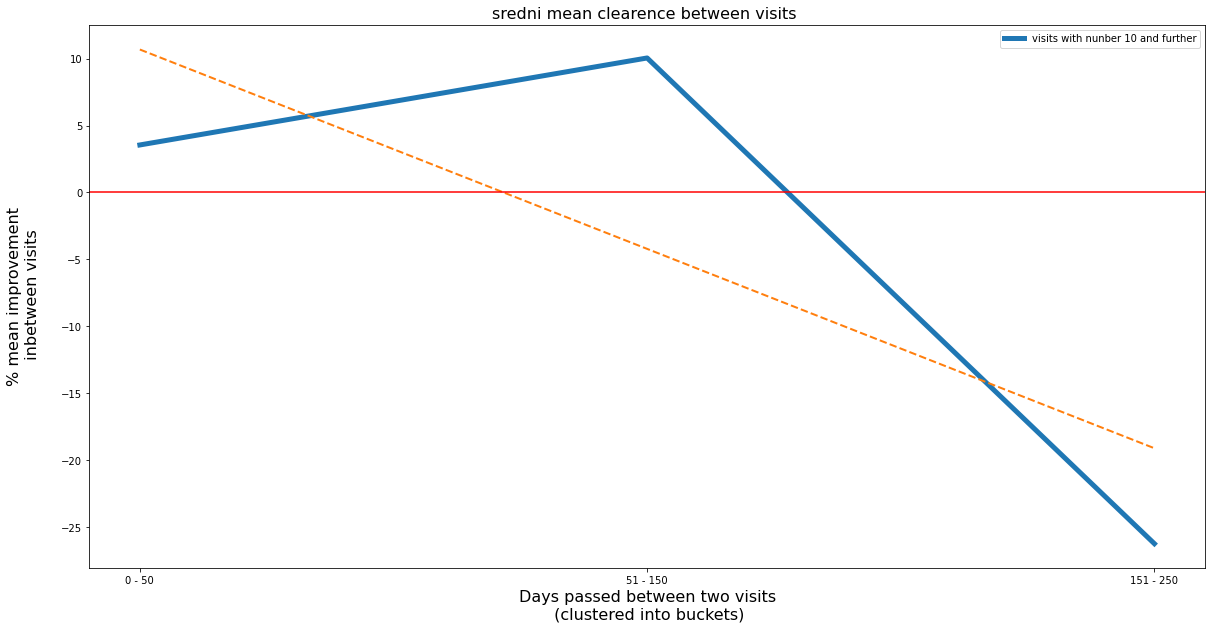

In [19]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,100,200], increment = 100)

Pearsons correlation of the linear fit for visits with nunber 10 and further: -0.897 (very bad practice though)


ValueError: Grouper for 'days passed' not 1-dimensional

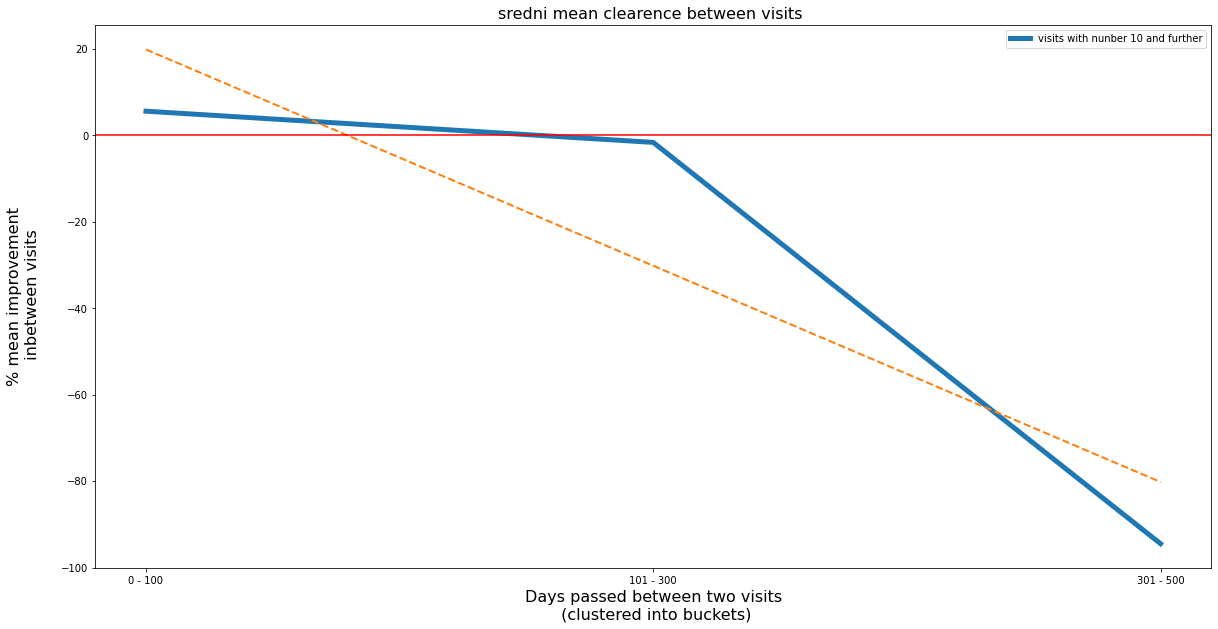

In [20]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,200,400], increment = 200)

In [21]:
# graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,100,200,300], increment = 100) # I dont like this one

## Answer to new question asked by Professor:
mam pytanie do Janka, tak jak zobaczyliśmy, że lepiej jest robić wizyty co 90-180 dni czyli co mniej więcej 180 dni, moje pytanie o to czy w fazie do 9 wizyt warto jest robić zabiegi co 4 tygodnie tak jak prosimy czy może jednak co 90 dni. Jest chińska praca na dzieciach, która sugeruje, że co 6 tygodni jest lepiej niż co 2 (ten sam efekt po 3 vs 6 zabiegach) w tym samym czasie. te rozbieżności były zawsze, ale może można spróbować wyszukać optymalnej częstotliwości na podstawie naszych danych?

In [22]:
print([i*56 for i in range(50)])

[0, 56, 112, 168, 224, 280, 336, 392, 448, 504, 560, 616, 672, 728, 784, 840, 896, 952, 1008, 1064, 1120, 1176, 1232, 1288, 1344, 1400, 1456, 1512, 1568, 1624, 1680, 1736, 1792, 1848, 1904, 1960, 2016, 2072, 2128, 2184, 2240, 2296, 2352, 2408, 2464, 2520, 2576, 2632, 2688, 2744]


default time group has GROUPS defined as: [0, 90, 180, 270, 360]
p-value of chi squred contigency test for wizyty 29 i blizsze: 0.0004542617420647846 (w. Yates correction - good practice)

p-value of chi squred contigency test for wizyty 15 i blizsze: 0.0015423926999728475 (w. Yates correction - good practice)

p-value of chi squred contigency test for wizyty 9 i blizsze: 0.009119548941590774 (w. Yates correction - good practice)

p-value of chi squred contigency test for wizyty 9 i blizsze: 0.47059819765872224 (w. Yates correction - good practice)

p-value of chi squred contigency test for wizyty 15 i blizsze: 0.33757660652658295 (w. Yates correction - good practice)

p-value of chi squred contigency test for wizyty 30 i blizsze: 0.34386207575381594 (w. Yates correction - good practice)

p-value of chi squred contigency test for wizyty 9 i blizsze: 0.09081538471591066 (w. Yates correction - good practice)

p-value of chi squred contigency test for wizyty 15 i blizsze: nan (w. Yates co

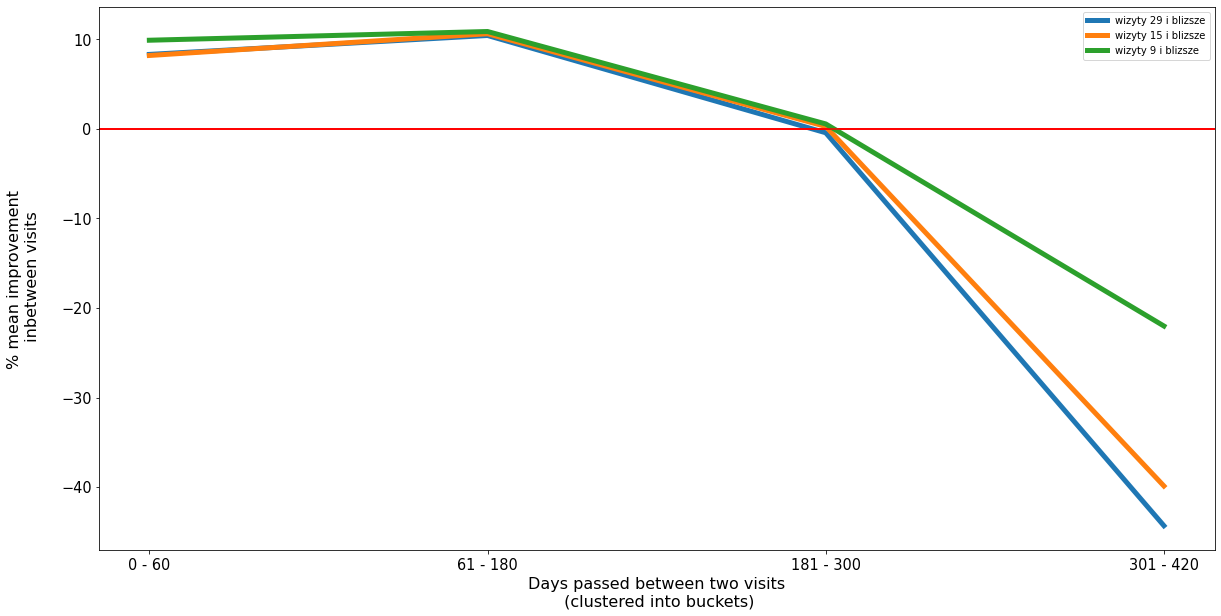

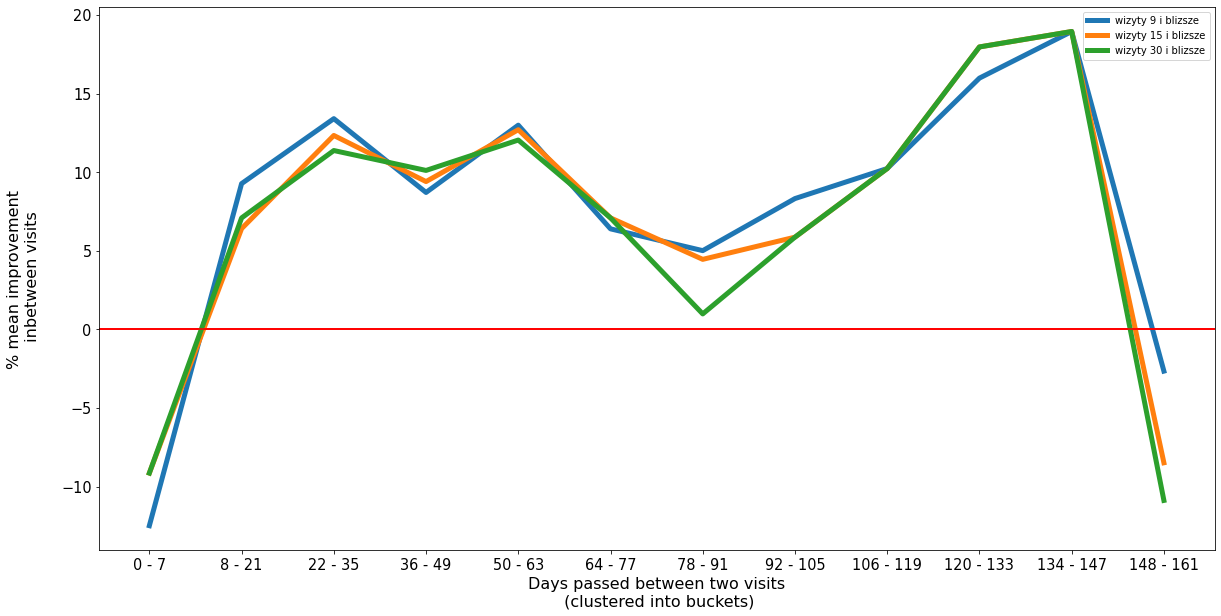

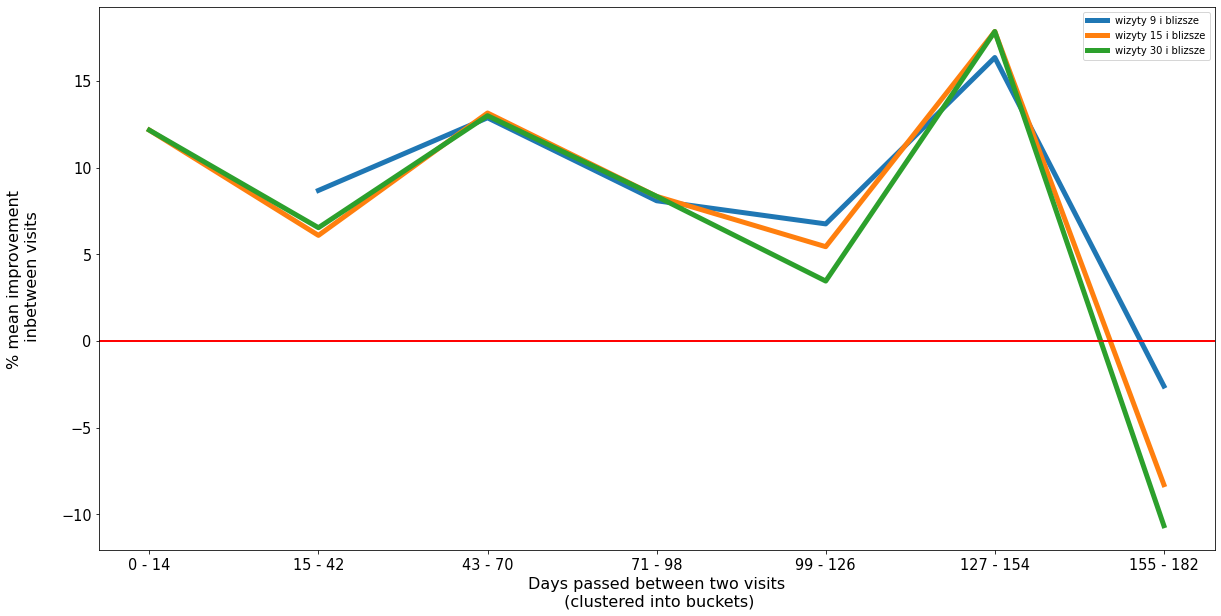

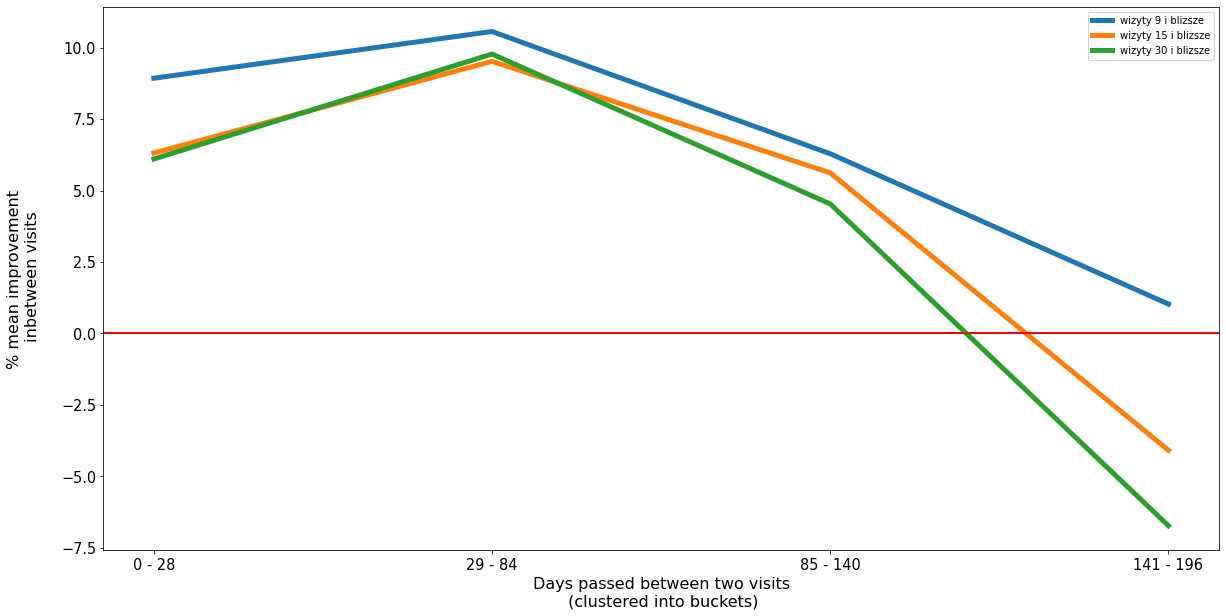

In [23]:
def answer():
    data = get_data(format_type='all',remove_minus_ones = True )
    # data_up_to_9th = data.loc[data.visit_number <= 9]
    # data_up_to_5th = data.loc[data.visit_number <= 5]
    # data_up_to_15th = data.loc[data.visit_number <= 15]
    a = graph_multiple_time_group_based_avg_graph(data, blizsze = True, GROUPS = [0,120,240,360], increment = 120, skip_linear_fit = True, wizyty_iteration = [29,15,9])
    # graph_multiple_time_group_based_avg_graph(data, blizsze = True, GROUPS = [0,90,180,270], increment = 90, skip_linear_fit = True, wizyty_iteration = [29,15,9])
    b = graph_multiple_time_group_based_avg_graph(data, blizsze = True, GROUPS = [0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168], increment = 14, skip_linear_fit = True, wizyty_iteration = [9,15,30])
    c = graph_multiple_time_group_based_avg_graph(data, blizsze = True, GROUPS = [0, 28, 56, 84, 112, 140, 168], increment = 28, skip_linear_fit = True, wizyty_iteration = [9,15,30])
    d = graph_multiple_time_group_based_avg_graph(data, blizsze = True, GROUPS = [0, 56, 112, 168], increment = 56, skip_linear_fit = True, wizyty_iteration = [9,15,30])
    return a,b,c,d


a,b,c,d = answer()

In [24]:
display(a)
display(d)
display(c)
display(b)

,time_group,patients_in_bucket wizyty 29 i blizsze,patients_in_bucket wizyty 15 i blizsze,patients_in_bucket wizyty 9 i blizsze
0,0,219,202,158
1,120,94,90,77
2,240,25,21,15
3,360,13,11,9


,time_group,patients_in_bucket wizyty 9 i blizsze,patients_in_bucket wizyty 15 i blizsze,patients_in_bucket wizyty 30 i blizsze
0,0,50,61,64
1,56,146,188,205
2,112,30,32,33
3,168,33,43,49


,time_group,patients_in_bucket wizyty 9 i blizsze,patients_in_bucket wizyty 15 i blizsze,patients_in_bucket wizyty 30 i blizsze
0,0,0,1,1
1,28,107,141,155
2,56,66,80,86
3,84,34,38,38
4,112,15,17,18
5,140,8,9,9
6,168,29,38,44


,time_group,patients_in_bucket wizyty 9 i blizsze,patients_in_bucket wizyty 15 i blizsze,patients_in_bucket wizyty 30 i blizsze
0,0,0,0,0
1,14,2,5,5
2,28,81,103,113
3,42,42,58,65
4,56,41,49,51
5,70,18,19,20
6,84,19,22,22
7,98,8,9,10
8,112,6,7,7
9,126,6,6,6


## --- End of the quick answer

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
p-value of chi squred contigency test for visits with nunber 5 and further: 0.11189111616267237 (w. Yates correction - good practice)

p-value of chi squred contigency test for all visits: 0.0004542617420647846 (w. Yates correction - good practice)



,time_group,patients_in_bucket visits with nunber 5 and further,patients_in_bucket all visits
0,0,125,219
1,120,57,94
2,240,23,25
3,360,6,13


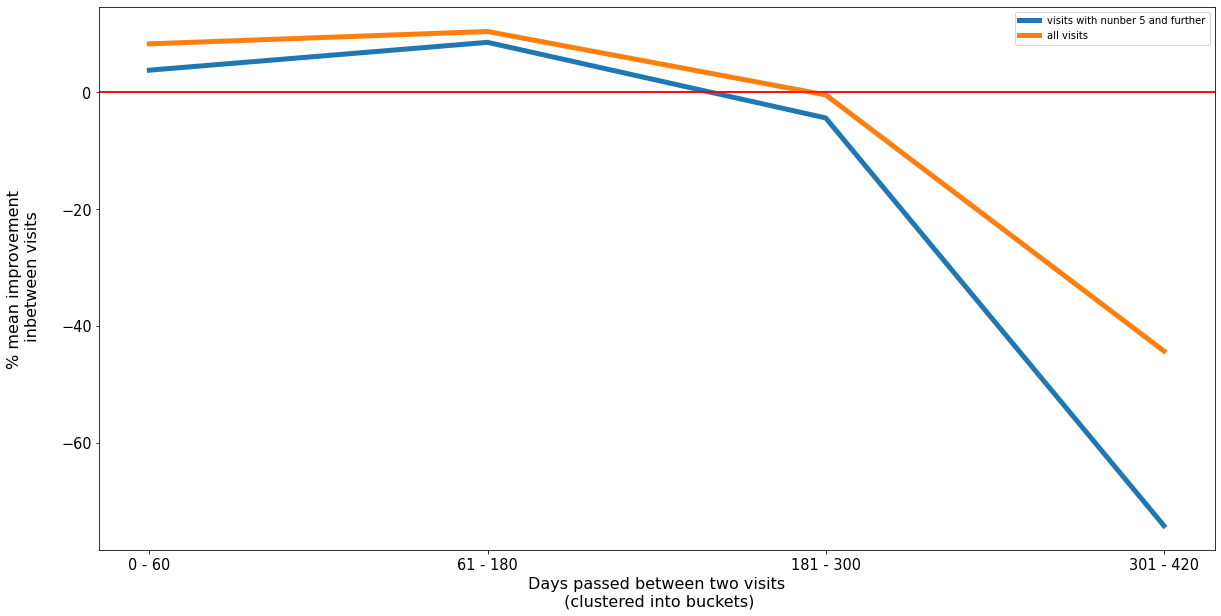

In [25]:
data = get_data(format_type='all',remove_minus_ones = True )
graph_multiple_time_group_based_avg_graph(data,blizsze = False, GROUPS = [0,120,240,360], increment = 120, skip_linear_fit = True, wizyty_iteration = [5,0])

Pearsons correlation of the linear fit for visits with nunber 10 and further: -0.757 (very bad practice though)


ValueError: Grouper for 'days passed' not 1-dimensional

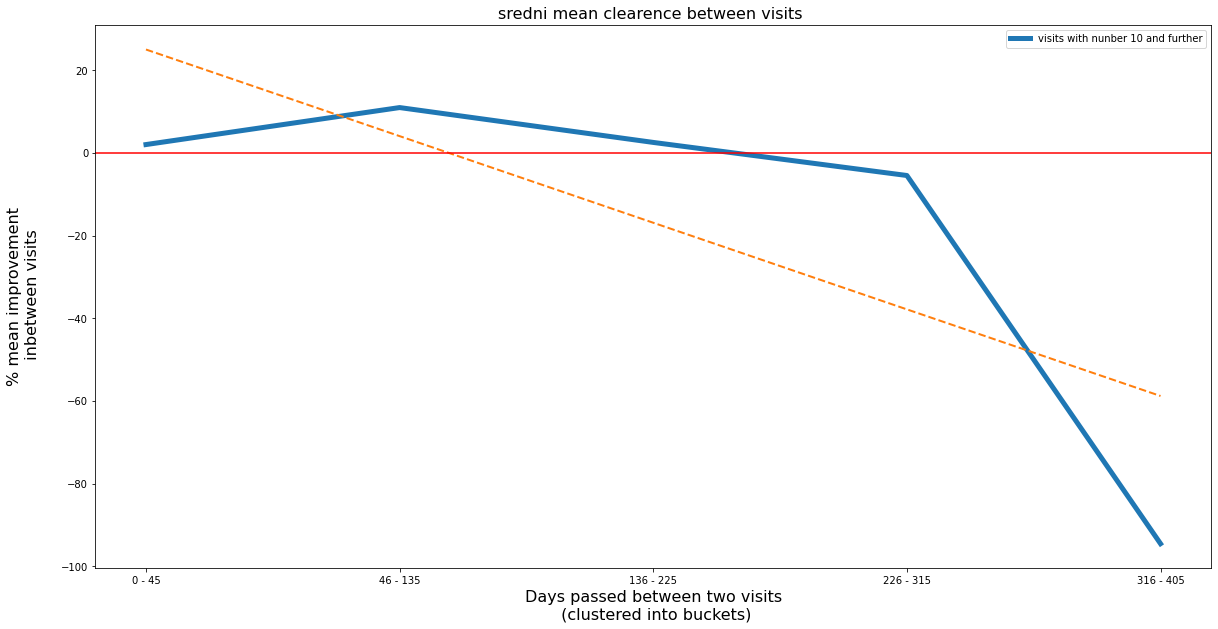

In [26]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,90,180,270,360], increment=90)

Pearsons correlation of the linear fit for visits with nunber 10 and further: -0.571 (very bad practice though)
p-value of chi squred contigency test for visits with nunber 10 and further: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for visits with nunber 5 and further: -0.339 (very bad practice though)
p-value of chi squred contigency test for visits with nunber 5 and further: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for visits with nunber 3 and further: -0.397 (very bad practice though)
p-value of chi squred contigency test for visits with nunber 3 and further: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for all visits: -0.405 (very bad practice though)
p-value of chi squred contigency test for all visits: nan (w. Yates correction - good practice)



,time_group,patients_in_bucket visits with nunber 10 and further,patients_in_bucket visits with nunber 5 and further,patients_in_bucket visits with nunber 3 and further,patients_in_bucket all visits
0,0,1,1,1,1
1,30,46,94,120,158
2,60,18,41,61,84
3,90,5,25,32,38
4,120,1,7,10,13
5,150,1,6,8,10
6,180,5,9,9,10
7,210,4,7,7,8
8,240,1,5,5,6
9,270,1,3,3,3


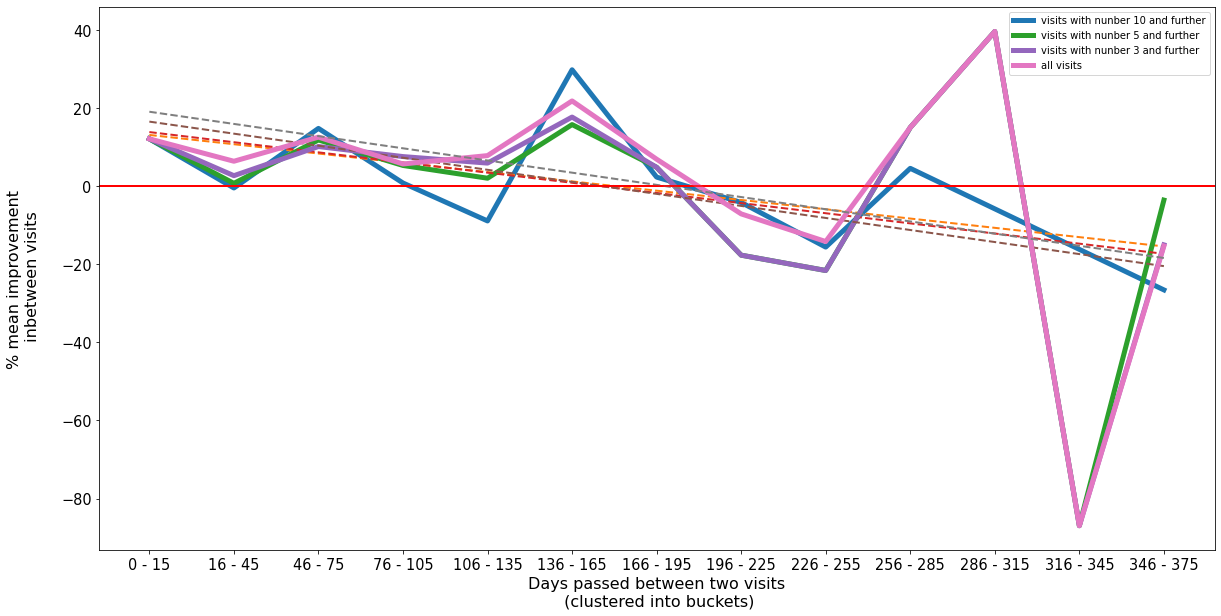

In [ ]:
    graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,30,60,90,120,150,180,210,240,270,300,330,360], increment=30)

### All users plots:

In [ ]:
# plot_all_users(non_moved_df, title = 'data bez zmian')
# plot_all_users(moved_df, title = 'data moved to 0s')
# plot_all_users(non0s_df, title = 'data bez 0s')

1.922890709642504e-15
-0.4070801163126517
1.519428118658625


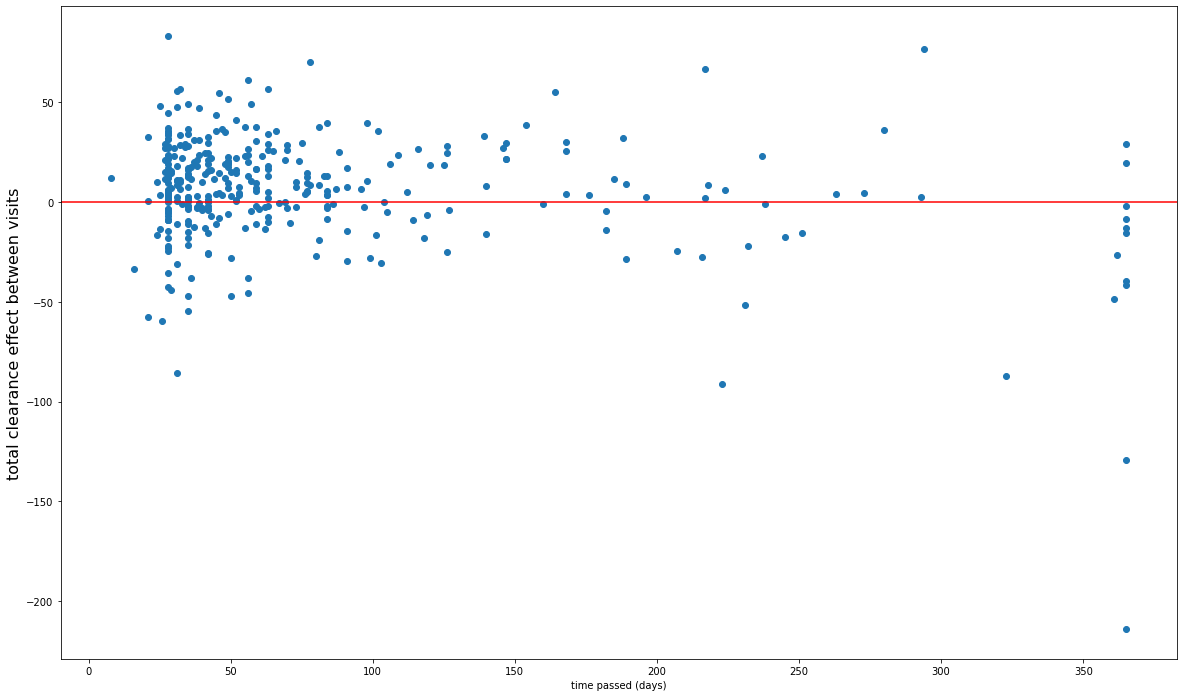

In [27]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 5th visit', label2 ='line fit to ALL data' ,plot_linear_fit = False)

## Scatter plots - dependent on visit:

6.697402803324392e-14
-0.43368859747733796
1.7386592222623178
Pearsons correlation: -0.279


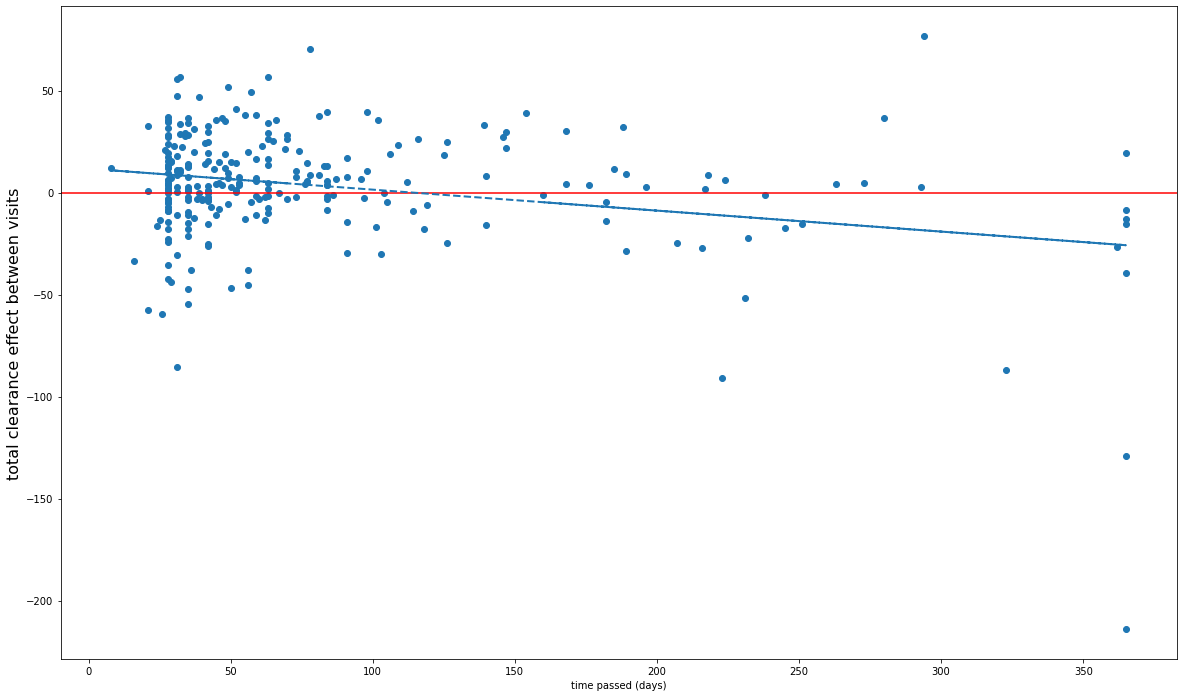

In [28]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 2], label = 'before or 5th visit', label2 ='line fit to ALL data' ,plot_linear_fit = True)

## Scatter plots - dependent on visit:

0.032020892871741265
-0.2415020277973625
2.932005132009721
0.023324697819204397
-0.24027839683451185
2.7445699711160016
9.686624812616631e-11
-0.5108256443723208
2.604660276687953
0.0001814363730132848
-0.5464121224714402
4.22455280105598


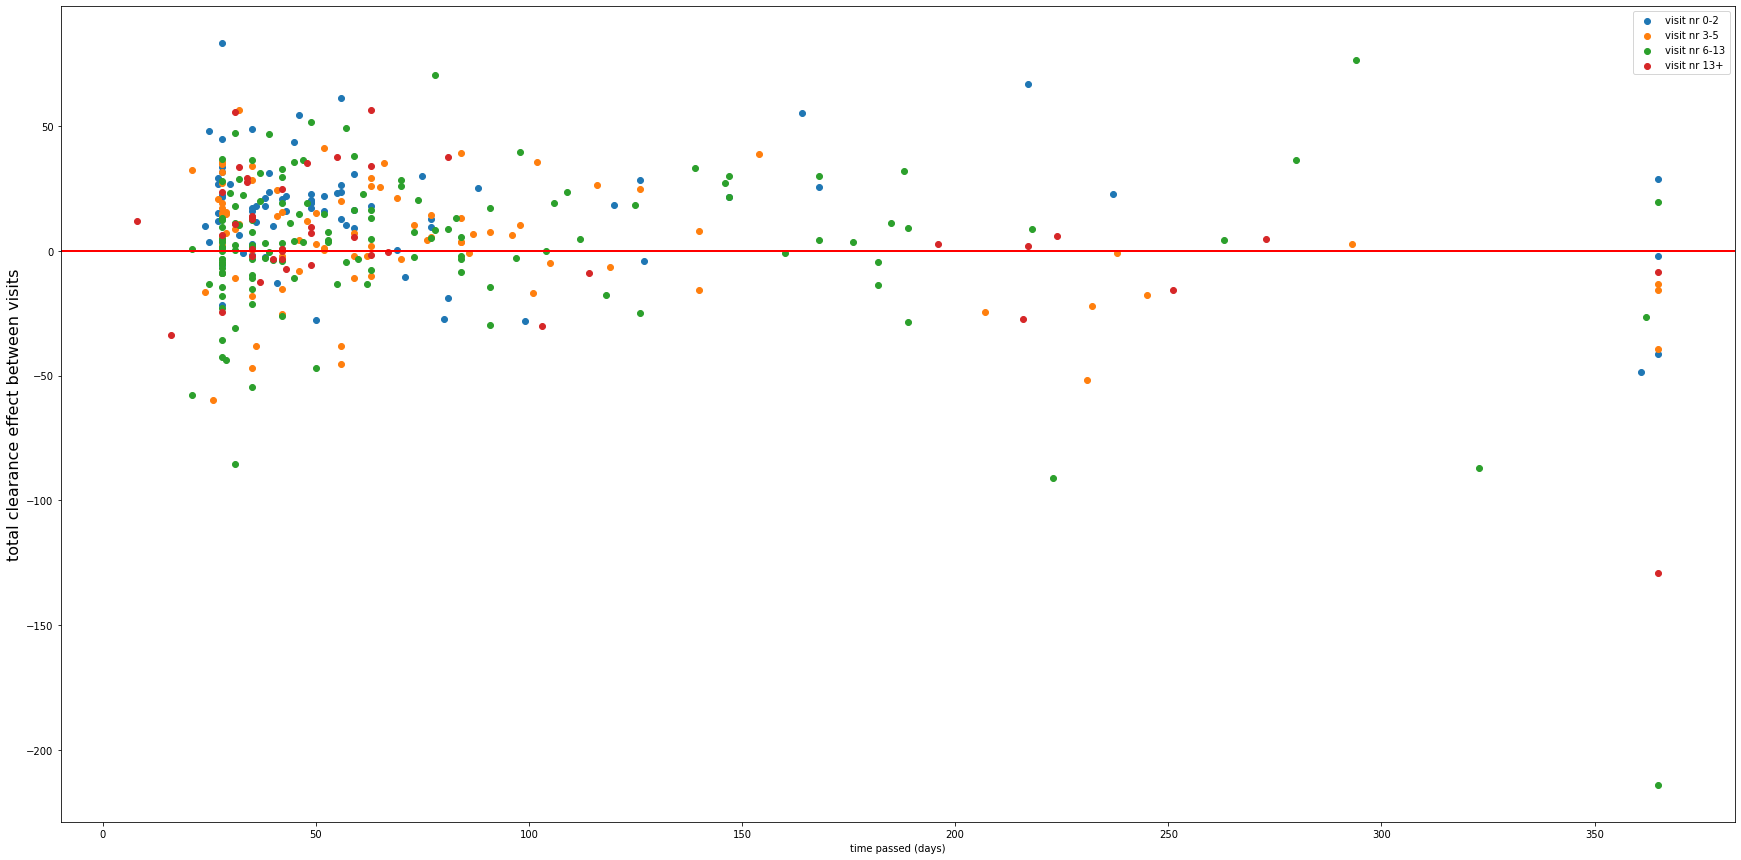

In [29]:
plt.figure(figsize=(30,15))

df1 = non_moved_df.loc[non_moved_df['visit_number'].isin([1,2])]
df2 = non_moved_df.loc[non_moved_df['visit_number'].isin([3,4,5])]
df3 = non_moved_df.loc[non_moved_df['visit_number'].isin([6,7,8,9,10,11,12,13])]
df5 = non_moved_df.loc[non_moved_df['visit_number'] > 13]


scatter_plot_against_time(df1, label = 'visit nr 0-2', plot_linear_fit= False)
scatter_plot_against_time(df2, label = 'visit nr 3-5', plot_linear_fit= False)
scatter_plot_against_time(df3, label = 'visit nr 6-13', plot_linear_fit= False)
scatter_plot_against_time(df5, label = 'visit nr 13+', plot_linear_fit= False)
plt.legend()

In [30]:
# weird_data = non_moved_df.loc[(non_moved_df['below 0'] == True) & (non_moved_df['time'] <75)] # Send to Michal & Professor
# weird_data.to_excel('dziwne_badania.xlsx')

1.922890709642504e-15
-0.4070801163126517
1.519428118658625
Pearsons correlation: -0.268
6.697402803324392e-14
-0.43368859747733796
1.7386592222623178
Pearsons correlation: -0.279


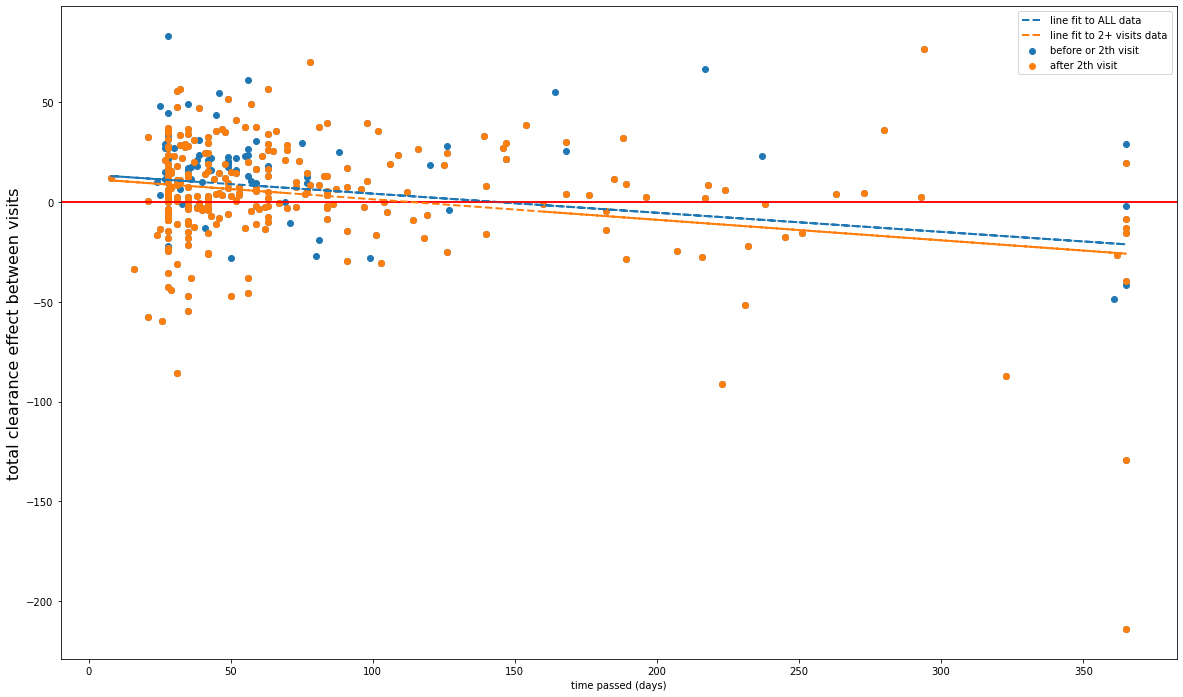

In [31]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 2th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 2], label = 'after 2th visit', label2= 'line fit to 2+ visits data')
plt.legend()

If time was longer than 360 I changed it to 360 to keep graph readable 

1.922890709642504e-15
-0.4070801163126517
1.519428118658625
Pearsons correlation: -0.268
8.23940055890413e-12
-0.4774794277776082
2.2268876261808828
Pearsons correlation: -0.273


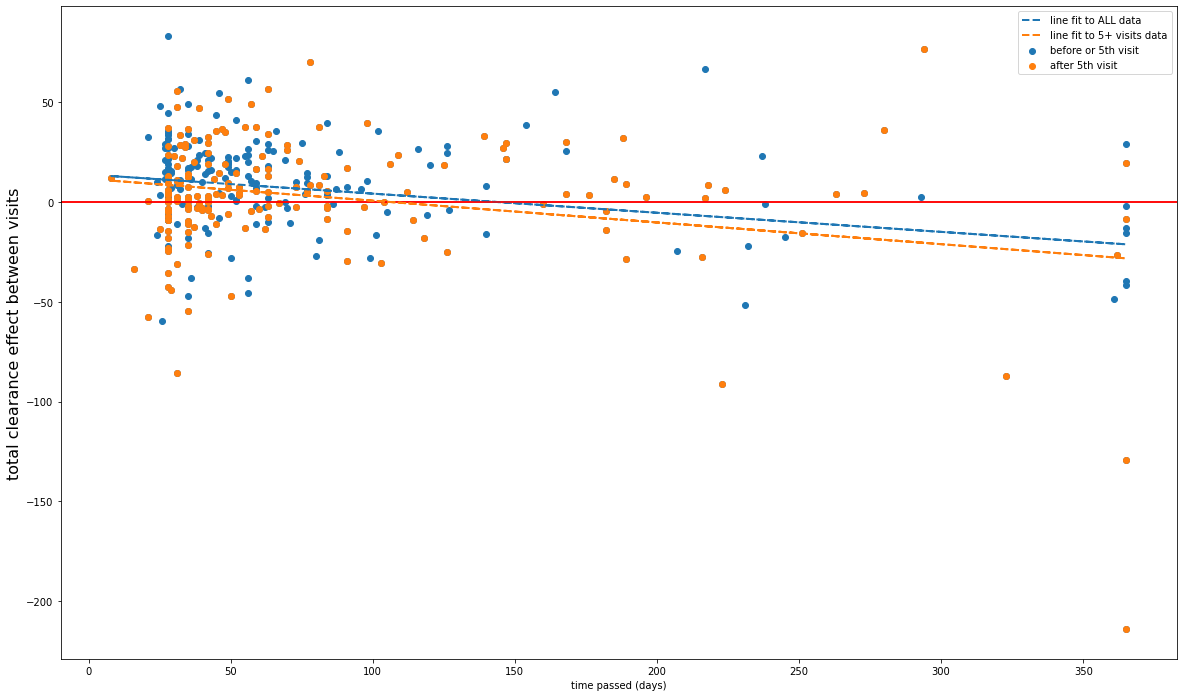

In [32]:
print('If time was longer than 360 I changed it to 360 to keep graph readable \n')

plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 5th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 5], label = 'after 5th visit', label2= 'line fit to 5+ visits data')
plt.legend()

1.922890709642504e-15
-0.4070801163126517
1.519428118658625
Pearsons correlation: -0.268
9.005032600134954e-06
-0.4793209344529385
2.6818862853591874
Pearsons correlation: -0.414


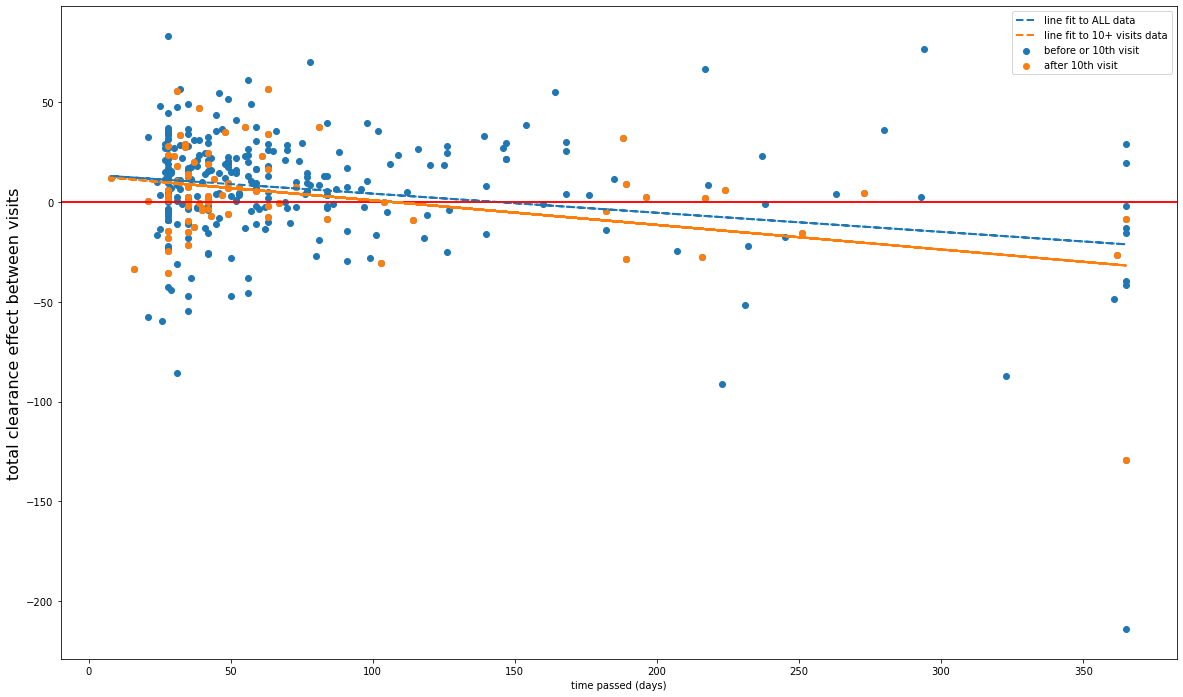

In [33]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 10th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 10], label = 'after 10th visit', label2= 'line fit to 10+ visits data')
plt.legend()

1.922890709642504e-15
-0.4070801163126517
1.519428118658625
Pearsons correlation: -0.268
0.001179770215952012
-0.5906589806264363
5.753504768951456
Pearsons correlation: -0.586


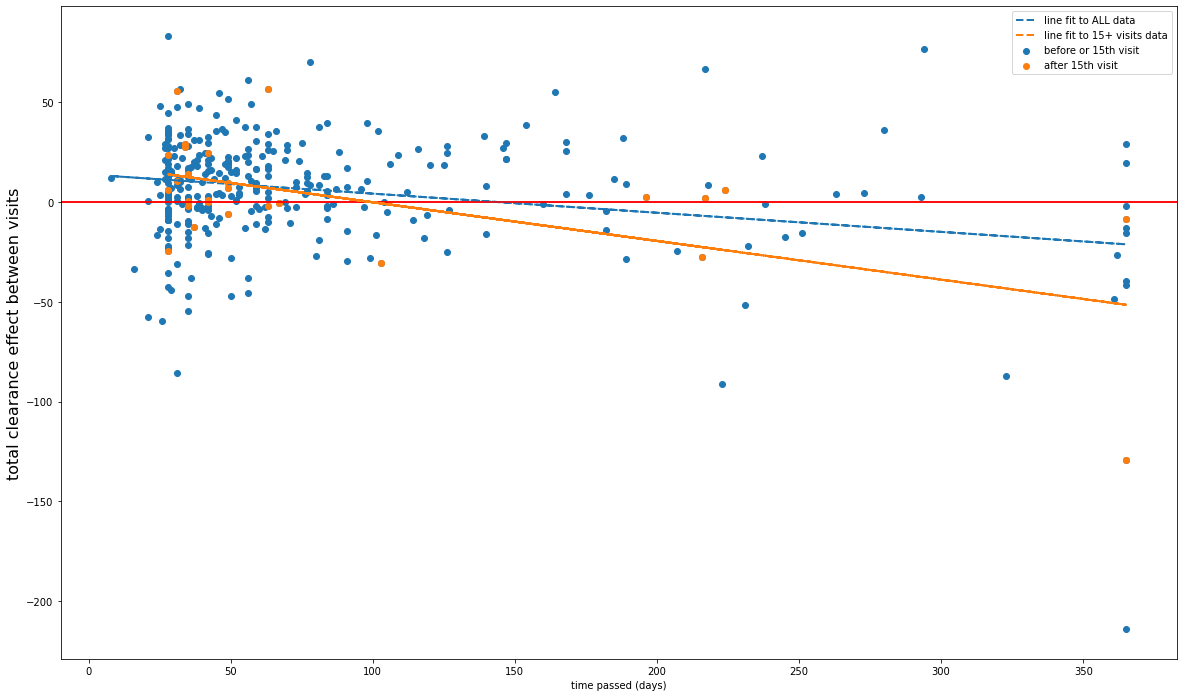

In [34]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 15th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 15], label = 'after 15th visit', label2= 'line fit to 15+ visits data')
plt.legend()

### Scatted plots - divided into time groups:

1.922890709642504e-15
-0.4070801163126517
1.519428118658625
1.4740592951805167e-07
-0.5504785016267258
4.87539149605436
0.0004970378164371063
-0.5378153935609356
10.041446166430676
0.012366040052988974
-0.5916030673837671
22.905515447846117
0.04611447805917753
-0.5841274292763386
32.36165956146954


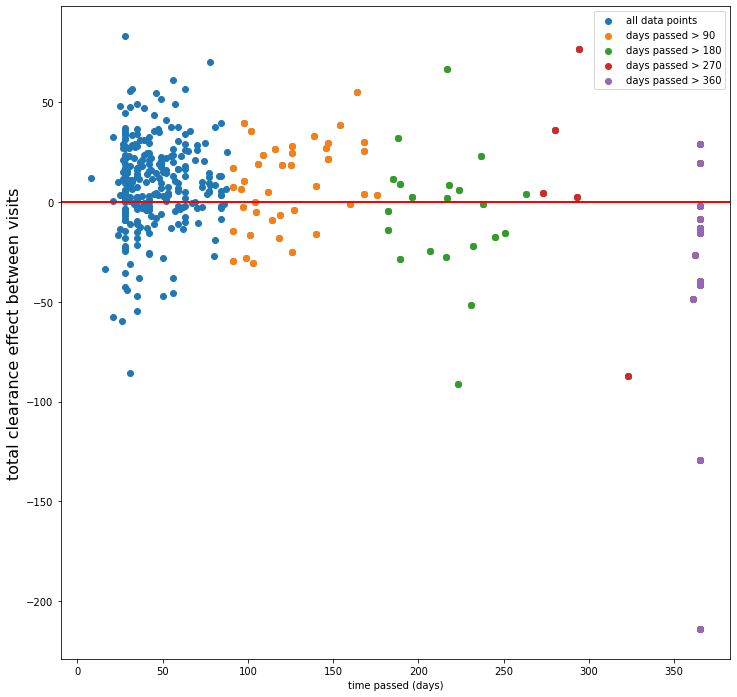

In [35]:
plt.figure(figsize=(12,12))
df0 = non_moved_df
df1 = non_moved_df.loc[non_moved_df['time'] > 90]
df2 = non_moved_df.loc[non_moved_df['time'] > 180]
df3 = non_moved_df.loc[non_moved_df['time'] > 270]
df4 = non_moved_df.loc[non_moved_df['time'] > 360]


scatter_plot_against_time(df0, label = 'all data points', label2 ='line fit to ALL data',plot_linear_fit = False)
scatter_plot_against_time(df1, label = 'days passed > 90', label2 ='',plot_linear_fit = False)
scatter_plot_against_time(df2, label = 'days passed > 180', label2 ='',plot_linear_fit = False)
scatter_plot_against_time(df3, label = 'days passed > 270', label2 ='',plot_linear_fit = False)
scatter_plot_against_time(df4, label = 'days passed > 360', label2 ='',plot_linear_fit = False)
plt.legend()

1.922890709642504e-15
-0.4070801163126517
1.519428118658625
Pearsons correlation: -0.268
1.4740592951805167e-07
-0.5504785016267258
4.87539149605436
Pearsons correlation: -0.368
0.0004970378164371063
-0.5378153935609356
10.041446166430676
Pearsons correlation: -0.312
0.012366040052988974
-0.5916030673837671
22.905515447846117
Pearsons correlation: -0.399


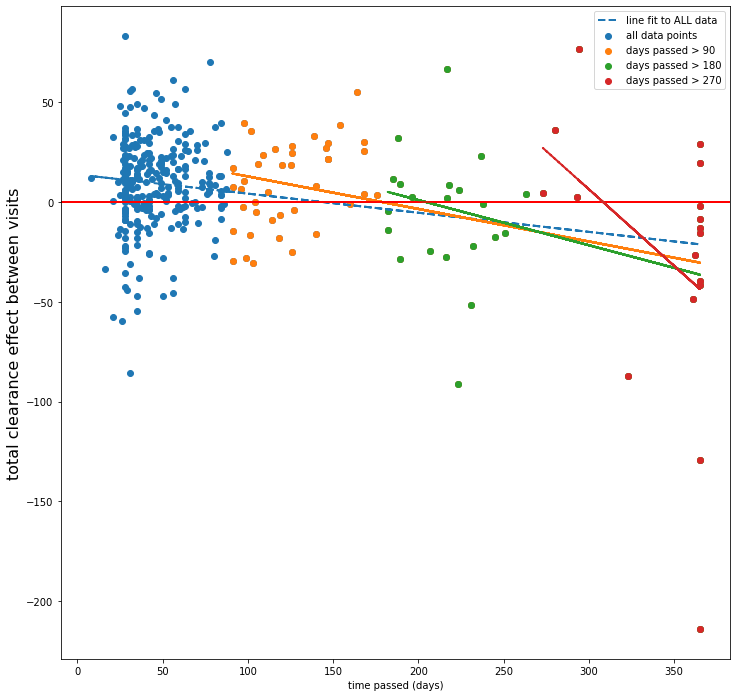

In [36]:
plt.figure(figsize=(12,12))
df0 = non_moved_df
df1 = non_moved_df.loc[non_moved_df['time'] > 90]
df2 = non_moved_df.loc[non_moved_df['time'] > 180]
df3 = non_moved_df.loc[non_moved_df['time'] > 270]


scatter_plot_against_time(df0, label = 'all data points', label2 ='line fit to ALL data')
scatter_plot_against_time(df1, label = 'days passed > 90', label2 ='')
scatter_plot_against_time(df2, label = 'days passed > 180', label2 ='')
scatter_plot_against_time(df3, label = 'days passed > 270', label2 ='')
plt.legend()

## Scatter plots - clearnce vs visit_nr

Pearsons correlation: -0.141


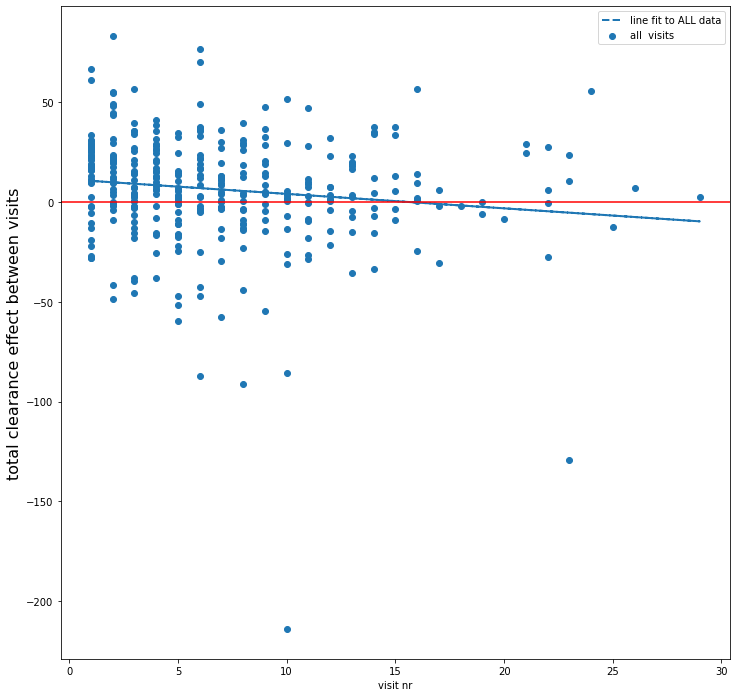

In [37]:
plt.figure(figsize=(12,12))
scatter_plot_against_visit_nr(non_moved_df, label = 'all  visits', label2 ='line fit to ALL data')
plt.legend()

##### Botplox explained:
<img src="boxplot_explained.png"
     alt="boxplot explained"/>

No handles with labels found to put in legend.


<Figure size 864x864 with 0 Axes>

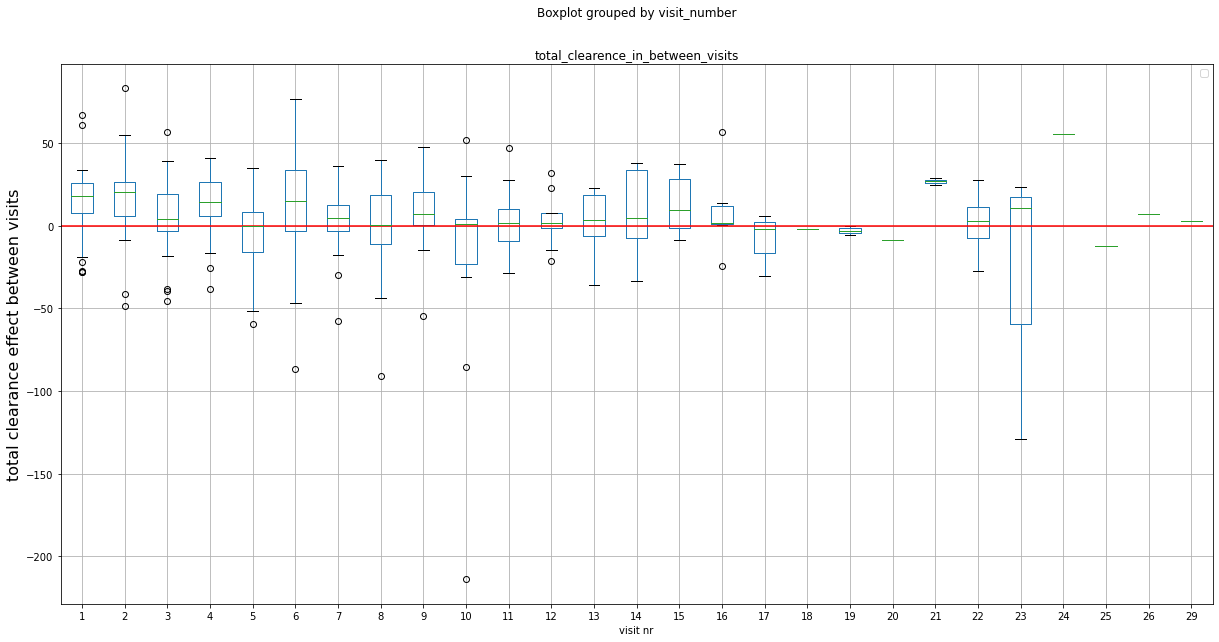

In [38]:
plt.figure(figsize=(12,12))
scatter_plot_against_visit_nr(non_moved_df, label = 'all  visits', label2 ='line fit to ALL data', plot_type='box', plot_linear_fit = False)
plt.legend()

Pearsons correlation: -0.077


<Figure size 864x864 with 0 Axes>

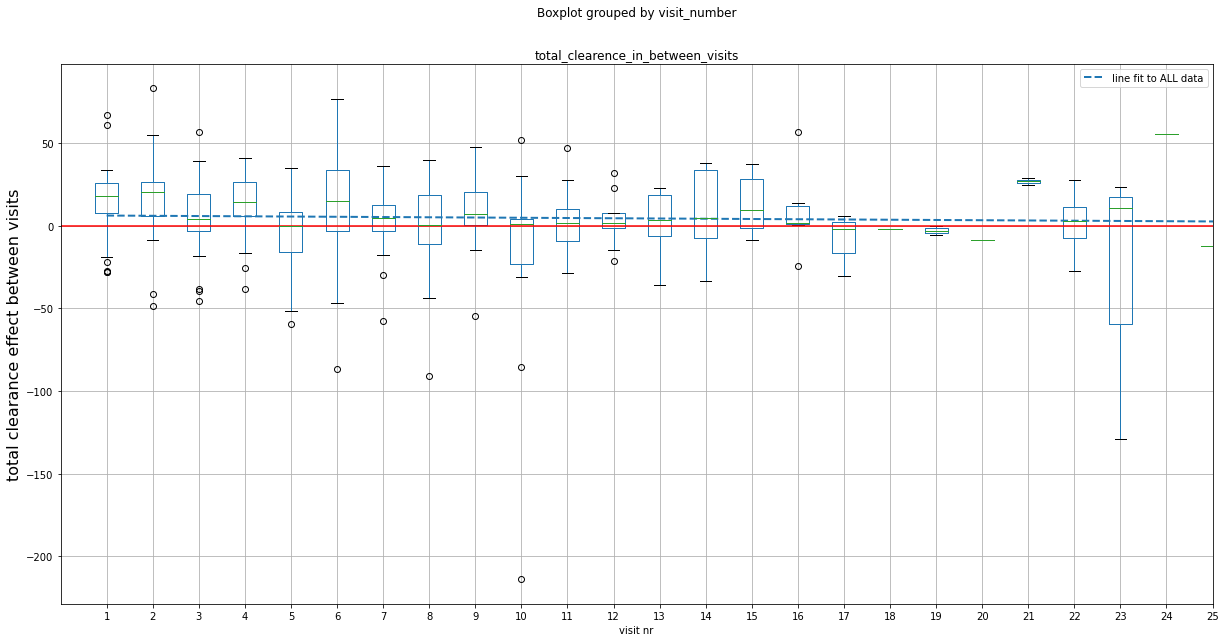

In [39]:
plt.figure(figsize=(12,12))
scatter_plot_against_visit_nr(non_moved_df, label = 'all  visits', label2 ='line fit to ALL data', plot_type='box', plot_linear_fit = True)
plt.legend()

### Statistical comparison of the means between 2 samples (data divided based on time)

In [40]:
non_moved_df

,surname,time,summed_time,days passed,visit_number,total_clearence_in_between_visits,total_clearence_in_respect_to_beginning,------------,mean improvement below 0,nr_visit_group,days passed
0,1.Gasek,57,57,1,1,10.435940,10.435942,,False,0,4
1,1.Gasek,958,1015,4,2,-1.909880,8.725376,,True,0,4
2,1.Gasek,70,1085,1,3,-3.152340,5.848092,,True,1,4
3,1.Gasek,63,1148,1,4,26.204230,30.519873,,False,1,4
4,1.Gasek,238,1386,3,5,-0.996100,29.827784,,True,1,4
...,...,...,...,...,...,...,...,...,...,...,...
346,70. Wójcicki,84,255,1,6,-1.909880,75.286637,,True,1,4
347,70. Wójcicki,84,339,1,7,-3.152340,69.913296,,True,1,4
348,70. Wójcicki,70,409,1,8,26.204230,83.173308,,False,2,4
349,70. Wójcicki,160,569,2,9,-0.996100,74.593279,,True,2,4


In [41]:

for days_passed_threshold in [60,120,180,240,300,360]:
    print()
    ttest_against_time_threshold(non_moved_df, 
                                 time_threshold = days_passed_threshold, 
                                 related_ttest = False)




test for days passsed: 60
left mean: 8.315
right mean: 2.981
p_value: 0.0408


test for days passsed: 120
left mean: 8.422
right mean: -4.587
p_value: 0.0006


test for days passsed: 180
left mean: 8.95
right mean: -15.445
p_value: 0.0


test for days passsed: 240
left mean: 8.154
right mean: -24.227
p_value: 0.0


test for days passsed: 300
left mean: 8.256
right mean: -44.314
p_value: 0.0


test for days passsed: 360
left mean: 7.975
right mean: -40.761
p_value: 0.0


### Statistical comparison of the means between 2 samples (data divided based on nr of visits)

In [42]:
1-3 -> srednia
4-6 -> srednia
7-9 -> srednia
10-13 -> srednia

wzgledne i bezwgledne statystyki (ttest independent and dependent)

SyntaxError: invalid syntax (<ipython-input-42-85ee5572df1d>, line 1)

In [43]:
for visit_nr_threshold in [2,5,6,7,8,9,10,15,20,25]:
    print(f'TEST FOR FOR NR VISITORS: {visit_nr_threshold}')
    ttest_against_time_threshold(non_moved_df,
                                 visit_nr_threshold=visit_nr_threshold, 
                                 related_ttest = False)
                                 
    # ttest_against_time_threshold(non_moved_df,
    #                              visit_nr_threshold=visit_nr_threshold, 
    #                              related_ttest = True)
    print('\n\n\n')

TEST FOR FOR NR VISITORS: 2

test for nr visits: 2
left mean: 16.088
right mean: 3.469
p_value: 0.0002




TEST FOR FOR NR VISITORS: 5

test for nr visits: 5
left mean: 9.998
right mean: 2.922
p_value: 0.0085




TEST FOR FOR NR VISITORS: 6

test for nr visits: 6
left mean: 10.19
right mean: 1.401
p_value: 0.0016




TEST FOR FOR NR VISITORS: 7

test for nr visits: 7
left mean: 9.398
right mean: 1.121
p_value: 0.0034




TEST FOR FOR NR VISITORS: 8

test for nr visits: 8
left mean: 8.527
right mean: 1.45
p_value: 0.0134




TEST FOR FOR NR VISITORS: 9

test for nr visits: 9
left mean: 8.538
right mean: 0.033
p_value: 0.0058




TEST FOR FOR NR VISITORS: 10

test for nr visits: 10
left mean: 7.083
right mean: 3.599
p_value: 0.1649




TEST FOR FOR NR VISITORS: 15

test for nr visits: 15
left mean: 6.725
right mean: 1.315
p_value: 0.166




TEST FOR FOR NR VISITORS: 20

test for nr visits: 20
left mean: 6.497
right mean: 1.414
p_value: 0.2592




TEST FOR FOR NR VISITORS: 25

test for nr

# Exploratory area:

### New task by professor:
`Sprawdzic czy pierwsze dwie wizyty po x dlugosci czasu (90, 180, 270, 360 dni) maja dobre wymiary - tak jak pierwsze dwie wizyty → range for the beginning and the end`

In [44]:
non_moved_df = get_data(format_type='all')
after_function = get_visits_after_wait_time_x(non_moved_df, 120)

default time group has GROUPS defined as: [0, 90, 180, 270, 360]


default time group has GROUPS defined as: [0, 90, 180, 270, 360]


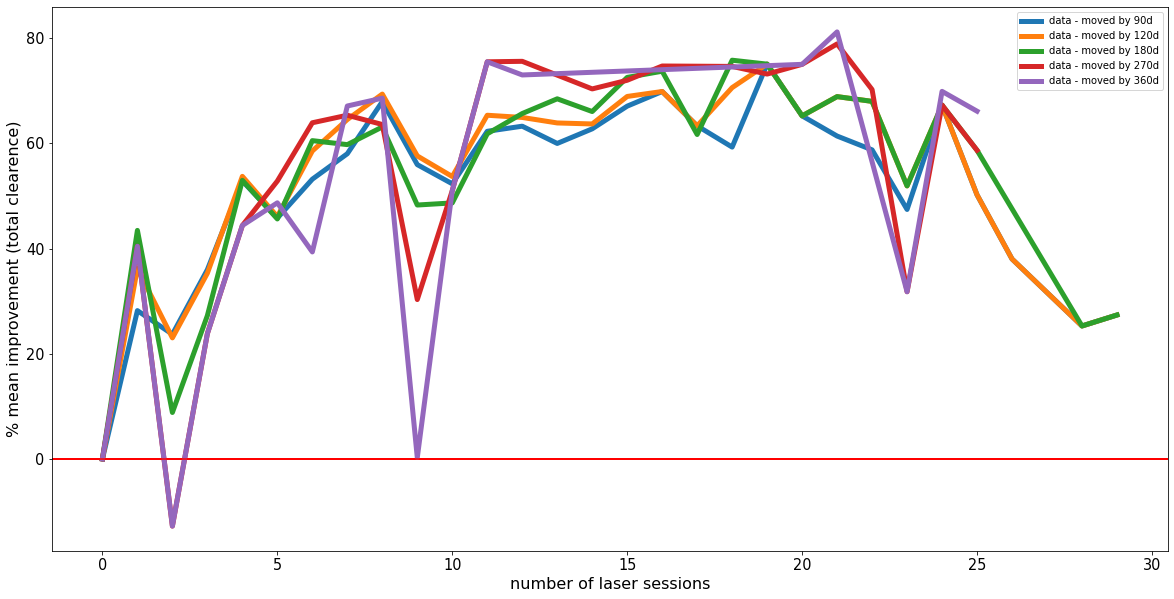

In [45]:
plt.figure(figsize=(20,10))
data = get_data(format_type='all',remove_minus_ones = False)

data = get_visits_after_wait_time_x(data, 90)
data2 = get_visits_after_wait_time_x(data, 120)
data3 = get_visits_after_wait_time_x(data, 180)
data4 = get_visits_after_wait_time_x(data, 270)
data5 = get_visits_after_wait_time_x(data, 360)


agg_column_graph(data, label = 'data - moved by 90d', column = 'total_clearence_in_respect_to_beginning')
agg_column_graph(data2, label = 'data - moved by 120d', column = 'total_clearence_in_respect_to_beginning')
agg_column_graph(data3, label = 'data - moved by 180d', column = 'total_clearence_in_respect_to_beginning')
agg_column_graph(data4, label = 'data - moved by 270d', column = 'total_clearence_in_respect_to_beginning')
agg_column_graph(data5, label = 'data - moved by 360d', column = 'total_clearence_in_respect_to_beginning')

## Next steps (to be done by the end of the week)
1. Double check the data (try to automate it and then compare, or just look by the eye)
2. Add 4 new columns (changes in colours/area compared to beginning/previous visit)
3. Double check all calculations
4. Look into further statistics
